# Example of tranfer function emulator usage

The purpose of this notebook is to demonstrate how to initalise and make predictions with the transfer funtion $T(k)$ base model component emulator of `matryoshka`.

We will start by loading the `emulator` module of `matryoshka` along with `matplotlib` for plotting and `time` for timing predictions. We will also load `numpy` and the base model validation set.

In [1]:
import matplotlib.pyplot as plt
import matryoshka.emulator as Matry
import time
import numpy as np
from matryoshka.training_funcs import dataset

valX = dataset("transfer", "val", "X")
valY = dataset("transfer", "val", "Y")

To initalise the $T(k)$ emulator is very simple, we use the `Transfer()` class. Upon initalisation all the neural network weighs are loaded, along with the pre-defined scalers needed to make predictions with the emulator and the $k$ values corresponding to the predictions.

In [2]:
# For environments with tensorflow>=2.5 this cell triggers a set of
# of warnings as the provided weights were produced with tensorflow==2.4.0
# Predictions can still be made using these weight, however new weights
# files will be provided in future versions that wont trigger these warnings.
TransferEmu = Matry.Transfer()

2021-10-29 16:29:44.491619: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Predictions are made with the `.emu_predict` method.

In [3]:
start = time.time()
# The variable mean_or_full='mean' means that the ensemble average predictions are returned, rather than
# predictions from the individual ensemble members
EmuPreds = TransferEmu.emu_predict(valX, mean_or_full='mean')
end = time.time()

print("{a} predictions made in {b} seconds.".format(a=valX.shape[0], b=np.round(end-start,3)))

1600 predictions made in 0.288 seconds.


We can compare these predictions to those in the validation set by calculating the absolute percentage error for each sample in the validation set. Taking the mean to calculate the mean absolute percentage error gives a scalar quantity we can use to asses the performance of the emulator.

In [4]:
APE = np.abs(EmuPreds-valY)/valY*100
print(APE.mean())

0.015811120950639978


We can plot these absolute percentage errors and see how accurate the tansfer function component emulator is.

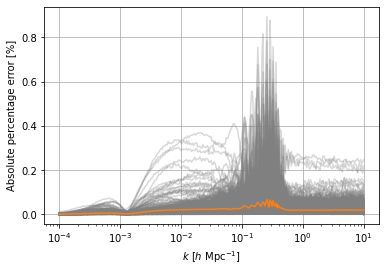

In [5]:
plt.figure()
plt.grid()
plt.semilogx(TransferEmu.kbins, APE.T, color='grey', alpha=0.3)
# We also plot the 1sigma level of the prediction error as a function of the wavenumber k.
plt.semilogx(TransferEmu.kbins, np.std(APE, axis=0), color='tab:orange')
plt.xlabel(r"$k \ [h \ \mathrm{Mpc}^{-1}]$")
plt.ylabel("Absolute percentage error [%]")
plt.show()